In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [4]:
def sp_wz_1(workdir):
    POS = workdir + "/POSCAR"
    OUT = workdir + "/OUTCAR"
    POSIN = !head -5 "{POS##*/}" | tail -3
    INCIN = !grep DIPOL "{INC##*/}"
    OUTIN = !grep dipole "{OUT##*/}"

    vecs = np.array([[float(i) for i in j.split()] for j in POSIN])
    Ionic = np.array([float(i) for i in OUTIN[1].split()[4:7]])
    electric= np.array([float(i) for i in OUTIN[2].split()[5:8]])

    TotalDip = Ionic + electric
    TotalDipM = np.array(TotalDip)

    TotalDipM[2] = (TotalDip[2] + vecs[2][2]/2 + 0.01) % vecs[2][2] - vecs[2][2]/2 - 0.01
    TotalDipM[1] = (TotalDip[1] + vecs[1][1]/2) % vecs[1][1] - vecs[1][1]/2
    TotalDipM[0] = (TotalDip[0] - (TotalDip[1] - TotalDipM[1])/vecs[1][1]*vecs[2][1] + vecs[0][0]/2) % vecs[0][0] - vecs[0][0]/2
    return {'Ion':Ionic, 'Electronic':electric, 'Total':TotalDip, 'Mod':TotalDipM}
    
    print(vecs)
    print(DIPOL)
    np.savetxt(sys.stdout, TotalDipM, '%0.5f')

def sp_rs_1(workdir, spin=1, var=2):
    POS = workdir + "/POSCAR"
    INC = workdir + "/INCAR"
    OUT = workdir + "/OUTCAR"
    POSIN = !head -5 "{POS##*/}" | tail -3
    INCIN = !grep DIPOL "{INC##*/}"
    OUTIN = !grep dipole "{OUT##*/}"

    vecs = np.array([[float(i) for i in j.split()] for j in POSIN])
    Ionic = np.array([float(i) for i in OUTIN[1].split()[4:7]])
    electric= np.array([float(i) for i in OUTIN[1+spin].split()[5:8]])

    TotalDip = Ionic + electric
    TotalDipM = np.array(TotalDip)

    dip = vecs[2][1]
    TotalDipM[2] = (TotalDip[2] + var + 0.01) % (dip*2) - var - 0.01
    TotalDipM[1] = (TotalDip[1] + var + 0.01) % (dip*2) - var - 0.01
    TotalDipM[0] = (TotalDip[0] + var + 0.01) % (dip*2) - var - 0.01
    return {'Ion':Ionic, 'Electronic':electric, 'Total':TotalDip, 'Mod':TotalDipM}
    
    print(vecs)
    print(DIPOL)
    np.savetxt(sys.stdout, TotalDipM, '%0.5f')


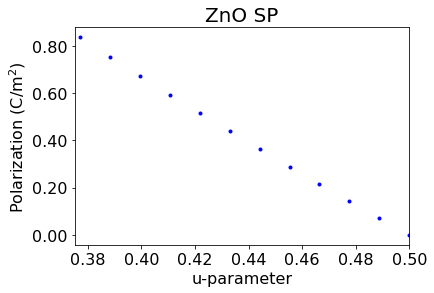

In [3]:
path = "/home/nadamski/SP/ZnO_sp/ZnO_sp/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]

    dip = sp_wz_1(lpath)
    tf[a] = dip["Mod"][2]

x = np.array([float(j) for j in folders])
cf = 1.6e-19/5.2446883970770823/2.8191824213275716/3.2553111805886981 * 1e20
tf = (tf % 5.2446883970770823)
P_ZnO = cf*tf

u_wz = 0.5 - x * (0.123)/11





fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)
plt.plot(u_wz,P_ZnO,'b.')

plt.xlim([0.375, 0.5])
#plt.ylim([0, 1.4])

ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))


plt.xlabel('u-parameter', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title('ZnO SP', fontsize=20)
plt.savefig('ZnO.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

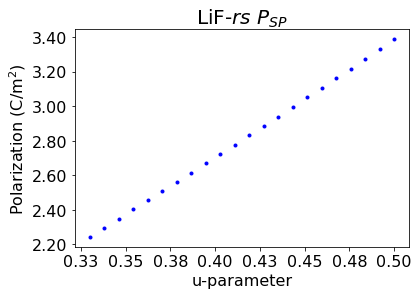

In [4]:
path = "/home/nadamski/SP/LiF_rs_sp/LiF_sp/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    dip = sp_rs_1(lpath)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])
cf = 16/2.0226320319171545**3/2
tf = tf % (2.0226320319171545 * 2*3**0.5)
P_LiFrs = cf*tf

u_rs_LiF = 0.33 + x/21*0.17

fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)
plt.plot(u_rs_LiF,P_LiFrs,'b.')

#plt.xlim([0.375, 0.5])
#plt.ylim([0, 1.4])

ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))


plt.xlabel('u-parameter', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title(r'LiF-$rs$ $P_{SP}$', fontsize=20)
plt.savefig('LiF_rs.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

12


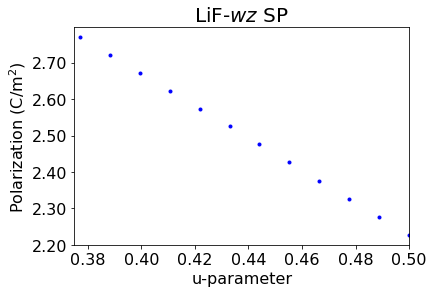

In [5]:
path = "/home/nadamski/SP/LiF_sp/LiF_rs_eq/"
folders = !ls "{path##*/}"
r = len(folders)
print(r)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    dip = sp_wz_1(lpath)
    tf[a] = dip["Mod"][2]

x = np.array([float(j) for j in folders])
cf = 1.6e-19/4.67812299804236/2.4941542573261546/2.8800153511614304 * 1e20
tf = (tf % 4.67812299804236) - 4.67812299804236
P_LiF = -cf*tf

u_wz = 0.5 - x * (0.123)/11





fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)
plt.plot(u_wz,P_LiF + cf* 4.67812299804236,'b.')

plt.xlim([0.375, 0.5])
#plt.ylim([0, 1.4])

ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))


plt.xlabel('u-parameter', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title(r'LiF-$wz$ SP', fontsize=20)
plt.savefig('LiF-wz.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

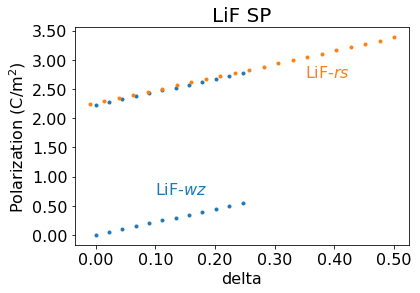

In [6]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)


plt.plot((1-2*u_wz), P_LiF, '.',color='C0')
plt.plot((1-2*u_wz), P_LiF+cf* 4.67812299804236, '.',color='C0')

plt.plot((3*u_rs_LiF - 1), P_LiFrs, '.', color='C1')


ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

plt.text(0.1, 0.70, r'LiF-$wz$', color='C0', fontsize=16)
plt.text(0.35, 2.70, r'LiF-$rs$', color='C1', fontsize=16)


plt.xlabel('delta', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title(r'LiF SP', fontsize=20)
plt.savefig('LiF.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [117]:
#path = "/home/nadamski/ScN_figures/Polar_GaNScN/GaN_data/"
path = "/home/nadamski/SP/GaN25_sp/GaN25_sp/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    dip = sp_wz_1(lpath)
    tf[a] = dip["Mod"][2]

x = np.array([float(j) for j in folders])
cf = 1.6e-19/5.2000529025666484/2.7724226341815377/3.2013335674394536 * 1e20
#print(tf)
tf = (tf - 0.01) % 5.2000529025666484 + 0.01 - 5.2000529025666484
P_GaN = -cf*tf
print(P_GaN)
u_wzG = 0.5 - x * (0.4995750046824270-0.3770187094116295)/11
P_GaN = P_GaN[:-1]
u_wzG = u_wzG[:-1]

[-5.58238313e-07  1.22916341e-01  2.45677236e-01  3.68094924e-01
  4.89992600e-01  6.11252395e-01  7.31650983e-01  8.50955534e-01
  9.68984323e-01  1.08565068e+00  1.20099677e+00  1.31529187e+00
  1.34026574e+00]


In [126]:
P_GaN[11] * 1 / 16 * 2.7724226341815377*3.2013335674394536

0.7296129243724876

In [131]:
2.7724226341815377*3.2013335674394536

8.875449641934269

In [127]:
(0.7296129243724876 - 0.7353377716247849) / 2

-0.0028624236261486358

[-2.13370988e-16 -3.41560000e-01 -6.81190000e-01 -1.01715000e+00
 -1.34805000e+00 -1.67285000e+00 -1.99099423e+00 -2.30226423e+00
  2.36181289e+00  2.06355289e+00  1.77090289e+00  1.48304289e+00]


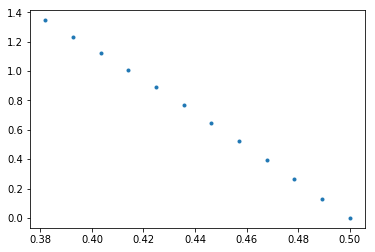

In [9]:
path = "/home/nadamski/SP/AlN_sp/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    dip = sp_wz_1(lpath)
    tf[a] = dip["Mod"][2]

x = np.array([float(j) for j in folders])
cf = 1.6e-19/4.9686071129434781/2.6877291575785529/3.1035219513932462 * 1e20
print(tf)
tf = (tf - 0.01) % 4.9686071129434781 + 0.01 - 4.9686071129434781
P_AlN = -cf*tf
u_wzA = 0.5 - x * (0.4990117481230423-0.3809882518769602)/11

plt.plot(u_wzA,P_AlN,'.')

In [10]:
P_AlN

array([-0.        ,  0.13185968,  0.26297427,  0.39267206,  0.52041643,
        0.64580589,  0.76862588,  0.88879206,  1.00635626,  1.12149992,
        1.23447782,  1.34560655])

In [138]:
(P_AlN[11] * 1 / 16 * 2.6877291575785529*3.1035219513932462 - 0.7081409774764923)/2

-0.003311800573218837

In [132]:
2.6877291575785529*3.1035219513932462

8.341426439944716

In [143]:
#AlGaN
(2.7724226341815377 + 2.6877291575785529)*(3.2013335674394536 + 3.1035219513932462)/4

8.606367039485715

In [144]:
(2.6877291575785529 + 3.0935317137301719)*(3.1035219513932462 + 3.5721027353375185)/4

9.648381948234782

In [142]:
#InGaN
(2.7724226341815377 + 3.0935317137301719)*(3.2013335674394536 + 3.5721027353375185)/4

9.933167032644398

In [134]:
(8.341426439944716 + 8.875449641934269) / 2

8.608438040939493

In [141]:
16 / 8.608438040939493* (0.12028989575843976 * 6 - 0.004743012386293155)

1.3326391779869884

In [139]:
16 / 8.341426439944716 * (0.7081409774764923 - 0.006623601146437674)

1.3456065460855715

In [136]:
(1.346 + 1.315) / 2

1.3305

In [11]:
path = "/home/nadamski/SP/ScN_wz/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    dip = sp_wz_1(lpath)
    tf[a] = dip["Mod"][2]

x = np.array([float(j) for j in folders])
cf = 1.6e-19/5.5065885571091195/3.0242068293347142/3.4920532540030043 * 1e20
print(tf)
tf = (tf - 0.01) % 5.5065885571091195 + 0.01 - 5.5065885571091195
P_ScNw = -cf*tf
u_wzS = 0.5 - x * (0.5-0.375)/11


[-2.13370988e-16 -4.26440000e-01 -8.22980000e-01 -1.18703000e+00
 -1.53063000e+00 -1.86742000e+00 -2.20867711e+00 -2.56192711e+00
  2.57612144e+00  2.19229144e+00  1.79393144e+00  1.38018144e+00]


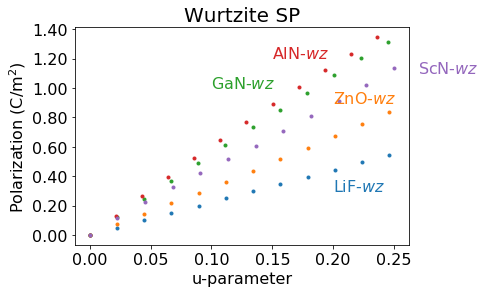

In [12]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)


plt.plot((1-2*u_wz), P_LiF, '.',color='C0')
plt.plot((1-2*u_wz), P_ZnO, '.',color='C1')
plt.plot((1-2*u_wzG), P_GaN, '.',color='C2')
plt.plot((1-2*u_wzA), P_AlN, '.',color='C3')
plt.plot((1-2*u_wzS), P_ScNw, '.',color='C4')



ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

plt.text(0.2, 0.30, r'LiF-$wz$', color='C0', fontsize=16)
plt.text(0.2, 0.90, r'ZnO-$wz$', color='C1', fontsize=16)
plt.text(0.10, 1.0, r'GaN-$wz$', color='C2', fontsize=16)
plt.text(0.15, 1.2, r'AlN-$wz$', color='C3', fontsize=16)
plt.text(0.27, 1.1, r'ScN-$wz$', color='C4', fontsize=16)


plt.xlabel('u-parameter', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title(r'Wurtzite SP', fontsize=20)
plt.savefig('wz.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [116]:
P_GaN

array([-5.58238313e-07,  1.15598043e-01,  2.30960905e-01,  3.45876557e-01,
        4.60157796e-01,  5.73683283e-01,  6.86337164e-01,  7.97987143e-01,
        9.08513896e-01,  1.01787582e+00,  1.12606946e+00,  1.23320227e+00])

In [109]:
path = "/home/nadamski/SP/ScN_rs/HSE/nosv/k15_2/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=1)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/100
cf = 16/2.2397660962929882**3/2
P_ScN = cf*tf
print(P_ScN)

u_m_Sc = (50/15)*x 
u_m_Ga = 1 - 2 * u_wzG
u_m_Al = 1 - 2 * u_wzA

[-0.06521839  0.12659756  0.30688284  0.47018661  0.62990709  0.79726817
  0.97263289  1.21085512  1.32330065  1.49761713  1.6764842   1.86425517
  2.06470369  2.28077719  2.51428851  2.76214223]


In [110]:
0.24511259054159473 / 0.5 * 15

7.3533777162478415

In [111]:
u_m_Sc

array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.24511259, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       ])

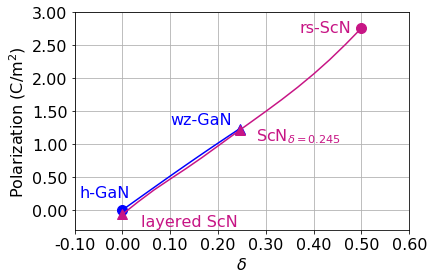

In [112]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)
plt.plot(u_m_Ga, P_GaN,'blue')
plt.plot(u_m_Ga[0], P_GaN[0],'blue',marker='o',markersize=10)
plt.plot(u_m_Ga[-1], P_GaN[-1],'blue',marker='^',markersize=10)

#plt.plot(u_m_Al, P_AlN,'C2')
#plt.plot(u_m_Al[0], P_AlN[0],'C2^',markersize=10)
#plt.plot(u_m_Al[-1], P_AlN[-1],'C2o',markersize=10)


plt.plot(u_m_Sc, P_ScN,'mediumvioletred')
plt.plot(u_m_Sc[0], P_ScN[0],'mediumvioletred',marker='^',markersize=10)
plt.plot(u_m_Sc[7], P_ScN[7],'mediumvioletred',marker='^',markersize=10)
plt.plot(u_m_Sc[-1], P_ScN[-1],'mediumvioletred',marker='o',markersize=10)


plt.xlim([-0.1, 0.6])
plt.ylim([-0.3, 3])
plt.grid()

ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

plt.text(0.37, 2.70, r'rs-ScN', color='mediumvioletred', fontsize=16)
plt.text(0.04, -0.25, r'layered ScN', color='mediumvioletred', fontsize=16)
plt.text(0.28, 1.05, r'ScN$_{\delta=0.245}$', color='mediumvioletred', fontsize=16)


plt.text(0.10, 1.30, r'wz-GaN', color='blue', fontsize=16)
plt.text(-0.09, 0.2, r'h-GaN', color='blue', fontsize=16)



#plt.xlabel(r'$u_{monolayer}$', fontsize=16)
plt.xlabel(r'$\delta$', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
#plt.title('Polarization v. cation position', fontsize=20)
plt.savefig('ScNGaN_polarization.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

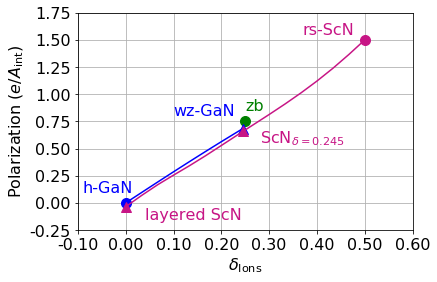

In [113]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)

P_GaN2 = P_GaN*(2.7724226341815377*3.2013335674394536)/16
P_ScN2 = P_ScN*(2.2397660962929882 **2 * 3**0.5)/16

plt.plot(0.25, 0.75,'green',marker='o',markersize=10)
plt.text(0.25, 0.85, r'zb', color='green', fontsize=16)


plt.plot(u_m_Ga, P_GaN2,'blue')
plt.plot(u_m_Ga[0], P_GaN2[0],'blue',marker='o',markersize=10)
plt.plot(u_m_Ga[-1], P_GaN2[-1],'blue',marker='^',markersize=10)

#plt.plot(u_m_Al, P_AlN,'C2')
#plt.plot(u_m_Al[0], P_AlN[0],'C2^',markersize=10)
#plt.plot(u_m_Al[-1], P_AlN[-1],'C2o',markersize=10)



plt.plot(u_m_Sc, P_ScN2,'mediumvioletred')
plt.plot(u_m_Sc[0], P_ScN2[0],'mediumvioletred',marker='^',markersize=10)
plt.plot(u_m_Sc[7], P_ScN2[7],'mediumvioletred',marker='^',markersize=10)
plt.plot(u_m_Sc[-1], P_ScN2[-1],'mediumvioletred',marker='o',markersize=10)




plt.xlim([-0.1, 0.6])
plt.ylim([-0.25, 1.75])
plt.grid()

ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

plt.text(0.37, 1.55, r'rs-ScN', color='mediumvioletred', fontsize=16)
plt.text(0.04, -0.15, r'layered ScN', color='mediumvioletred', fontsize=16)
plt.text(0.28, 0.55, r'ScN$_{\delta=0.245}$', color='mediumvioletred', fontsize=16)


plt.text(0.10, 0.8, r'wz-GaN', color='blue', fontsize=16)
plt.text(-0.09, 0.1, r'h-GaN', color='blue', fontsize=16)



#plt.xlabel(r'$u_{monolayer}$', fontsize=16)
plt.xlabel(r'$\delta_{\rm Ions}$', fontsize=16)
plt.ylabel(r'Polarization ($e/A_{\rm int}$)', fontsize=16)
#plt.title('Polarization v. cation position', fontsize=20)
plt.savefig('ScNGaN_polarization_Aint.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [114]:
P_GaN2

array([-3.09663502e-07,  6.41240380e-02,  1.28117618e-01,  1.91863123e-01,
        2.55256709e-01,  3.18231068e-01,  3.80721933e-01,  4.42655919e-01,
        5.03966833e-01,  5.64631601e-01,  6.24648298e-01,  6.84076540e-01])

In [115]:
P_ScN2

array([-0.03541735,  0.06874978,  0.16665509,  0.25533846,  0.3420759 ,
        0.43296262,  0.52819578,  0.6575642 ,  0.71862861,  0.81329251,
        0.91042766,  1.01239813,  1.12125324,  1.23859362,  1.36540374,
        1.50000261])

In [20]:
P_ScN

array([-0.06521839,  0.12659756,  0.30688284,  0.47018661,  0.62990709,
        0.79726817,  0.97263289,  1.21085512,  1.32330065,  1.49761713,
        1.6764842 ,  1.86425517,  2.06470369,  2.28077719,  2.51428851,
        2.76214223])

In [21]:
2.2482935084854385 / 2.0226320319171545

1.1115682304083707

In [22]:
[5.2000529025666484 / 1.1115682304083707, 2.7724226341815377 / 1.1115682304083707, 3.2013335674394536 / 1.1115682304083707]

[4.67812299804236, 2.4941542573261546, 2.8800153511614304]

In [23]:
 3.2013335674394536 / 1.1115682304083707 / 2

1.4400076755807152

In [24]:
u_m_Sc, P_ScN

(array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.24511259, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       ]),
 array([-0.06521839,  0.12659756,  0.30688284,  0.47018661,  0.62990709,
         0.79726817,  0.97263289,  1.21085512,  1.32330065,  1.49761713,
         1.6764842 ,  1.86425517,  2.06470369,  2.28077719,  2.51428851,
         2.76214223]))

In [25]:
(P_ScN[5] * 1 + P_ScN[6] * 5)/6

0.9434054336776896

In [26]:
P_GaN[-1] * 0.25 / 0.24511259

1.3415180690588127

In [27]:
1.3415180690588127 - 1.2274565956499053

0.11406147340890738

In [28]:
2.2482935084854385 * 2**0.5 

3.1795671718954965

In [30]:
            Ionic dipole moment: p[ion]=(    -2.98781    -2.98781    -2.98781 ) electrons Angst
    Spin resolved dipole moment: p[sp1]=(     1.45285     1.45285     1.45285 ) electrons Angst
 Total electronic dipole moment: p[elc]=(     2.90890     2.90114     2.90702 ) electrons Angst


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [ ]:
A = (-2.98781 + 2.90890)**2 + (-2.98781 + 2.93143)**2 + (-2.98781 + 2.90702)**2
A

In [ ]:
A**0.5 / 22.958980366997654 * 16

In [ ]:
1.388 / 25 / 8.85e-12

In [ ]:
0.9 / 6.27e9

In [ ]:
((-2.98781 + 2.93918)**2 + (-2.98781 + 2.93844)**2 + (-2.98781 + 2.93724)**2) **0.5 / 22.958980366997654 * 16

In [ ]:
-2.98781 + 2.90890

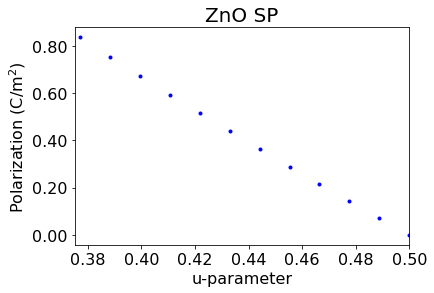

In [62]:
path = "/home/nadamski/SP/ZnO_sp/ZnO_sp/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]

    dip = sp_wz_1(lpath)
    tf[a] = dip["Mod"][2]

x = np.array([float(j) for j in folders])
cf = 1.6e-19/5.2446883970770823/2.8191824213275716/3.2553111805886981 * 1e20
tf = (tf % 5.2446883970770823)
P_ZnO = cf*tf

u_wz_Zn = 0.5 - x * (0.123)/11





fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)
plt.plot(u_wz,P_ZnO,'b.')

plt.xlim([0.375, 0.5])
#plt.ylim([0, 1.4])

ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))


plt.xlabel('u-parameter', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title('ZnO SP', fontsize=20)
plt.savefig('ZnO.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [63]:
path = "/home/nadamski/SP/CaO_rs/PBE/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=1)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/66 + 0.3333333
cf = 16/2.42**3/2
P_CaO = cf*tf
print(tf)

u_m_Ca = 3*x - 1
u_m_Zn = 1 - 2 * u_wz_Zn
u_m_Al = 1 - 2 * u_wzA

[-2.82325678e+00 -2.68704831e+00 -2.55198298e+00 -2.41910005e+00
 -2.28831289e+00 -2.15894601e+00 -2.02996690e+00 -1.90058271e+00
 -1.77019392e+00 -1.63845414e+00 -1.50493034e+00 -1.36925880e+00
 -1.23083330e+00 -1.08934207e+00 -9.44248174e-01 -7.95291804e-01
 -6.42386359e-01 -4.85739684e-01 -3.25871394e-01 -1.63578234e-01
 -3.35553984e-06]


In [64]:
path = "/home/nadamski/SP/MgO_rs/PBE/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=1)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/66 + 0.3333333
cf = 16/2.12194**3/2
P_MgO = cf*tf
print(tf)

u_m_Ca = 3*x - 1
u_m_Zn = 1 - 2 * u_wz_Zn
u_m_Mg = 3*x - 1

[-2.49273650e+00 -2.36532684e+00 -2.23725900e+00 -2.10896600e+00
 -1.98072496e+00 -1.85284765e+00 -1.72548177e+00 -1.59876493e+00
 -1.47272359e+00 -1.34737508e+00 -1.22271938e+00 -1.09865258e+00
 -9.75174678e-01 -8.52181750e-01 -7.29656476e-01 -6.07477612e-01
 -4.85610517e-01 -3.63985909e-01 -2.42551827e-01 -1.21256309e-01
  4.56780734e-06]


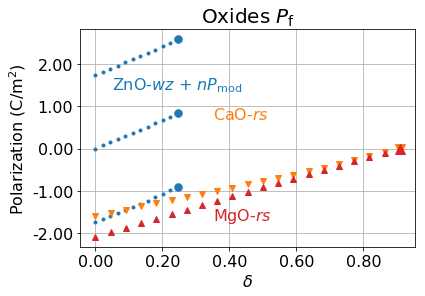

In [65]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)

P_mod = 16 / (3.2553**2*3**0.5/2)

plt.plot(u_m_Zn, P_ZnO, '.',color='C0')
plt.plot(u_m_Zn, P_ZnO+P_mod, '.',color='C0')
plt.plot(u_m_Zn, P_ZnO-P_mod, '.',color='C0')

plt.plot(u_m_Zn[-1], P_ZnO[-1], '.',color='C0',markersize=15)
plt.plot(u_m_Zn[-1], P_ZnO[-1]+P_mod, '.',color='C0',markersize=15)
plt.plot(u_m_Zn[-1], P_ZnO[-1]-P_mod, '.',color='C0',markersize=15)


plt.plot(u_m_Ca, P_CaO, 'v', color='C1')
plt.plot(u_m_Mg, P_MgO, '^', color='C3')

plt.plot(u_m_Ca[-1], P_CaO[-1], 'v', color='C1',markersize=10)
plt.plot(u_m_Mg[-1], P_MgO[-1], '^', color='C3',markersize=10)



ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

plt.text(0.05, 1.40, r'ZnO-$wz$ + $nP_{\rmmod}$', color='C0', fontsize=16)
plt.text(0.35, 0.70, r'CaO-$rs$', color='C1', fontsize=16)
plt.text(0.35, -1.70, r'MgO-$rs$', color='C3', fontsize=16)

plt.grid(True)
plt.xlabel(r'$\delta$', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title(r'Oxides $P_{\rm f}$', fontsize=20)
plt.savefig('Oxides.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

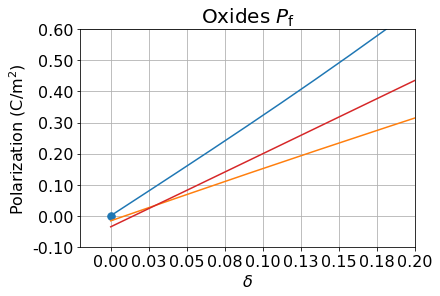

In [66]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)

P_mod_Ca = 16 / ((2.42*2**0.5)**2*3**0.5/2)
P_mod_Mg = 16 / ((2.1219414136780603*2**0.5)**2*3**0.5/2)

plt.plot(u_m_Zn, P_ZnO,color='C0')

plt.plot(u_m_Zn[0], P_ZnO[0], '.',color='C0',markersize=15)


plt.plot(u_m_Ca, P_CaO+P_mod_Ca, color='C1')
plt.plot(u_m_Mg, P_MgO+P_mod_Mg, color='C3')

plt.xlim([-0.02, 0.2])
plt.ylim([-0.1, 0.6])


ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

#plt.text(0.05, 1.40, r'ZnO-$wz$', color='C0', fontsize=16)
#plt.text(0.35, 0.70, r'CaO-$rs$', color='C1', fontsize=16)
#plt.text(0.35, -1.70, r'MgO-$rs$', color='C3', fontsize=16)

plt.grid(True)
plt.xlabel(r'$\delta$', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title(r'Oxides $P_{\rm f}$', fontsize=20)
plt.savefig('Oxides0.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [67]:
path = "/home/nadamski/SP/ZnSe_zb/PBE/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=1,var=4)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/90 + 0.25
cf = 16/2.12194**3/2
P_ZnSe = cf*tf
print(tf)

u_m_zb = 3*x - 1


[-4.98105649 -4.63466942 -4.30625526 -4.01002261 -3.75113298 -3.52645135
 -3.32730015 -3.14093148 -2.95068711 -2.73641511]


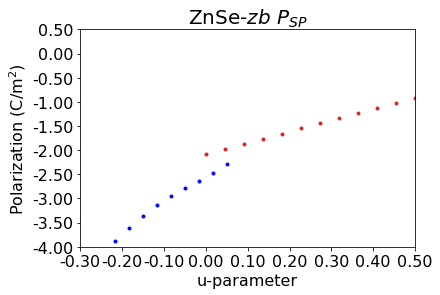

In [68]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)
plt.plot(u_m_zb,P_ZnSe,'b.')
plt.plot(u_m_Mg, P_MgO, '.', color='C3')

plt.xlim([-0.3, 0.5])
plt.ylim([-4, 0.5])

ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))


plt.xlabel('u-parameter', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title(r'ZnSe-$zb$ $P_{SP}$', fontsize=20)
plt.savefig('ZnSe.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [69]:
P_mod= 16 / (2.0226320319171545**2*3**0.5/2)

In [70]:
P_mod

4.516017221601282

In [71]:
[2.12194 * 2**0.5, 3.2553, 2.42*2**0.5]

[3.0008763265419653, 3.2553, 3.42239682094289]

In [72]:
[P_MgO[0], P_ZnO[0]-P_mod, P_CaO[0]]

[-2.0872143921980952, -4.516016688760764, -1.593654850894499]

In [73]:
3.2553111805886981 / 2**0.5

2.301852610666654

In [74]:
4.060 / 2**0.5

2.8708535316173824

In [75]:
3.854  / 2**0.5

2.725189534692954

In [76]:
-0.00932 * 16 / ((2.86*2)**3/4)

-0.003187188868640285

In [77]:
1

1

In [78]:
#kpoint-convergence

Psp = [-0.1054, -0.0805, -0.0728, -0.0702, -0.0689]
k = np.array([6, 10, 15, 20, 25]).astype(float)

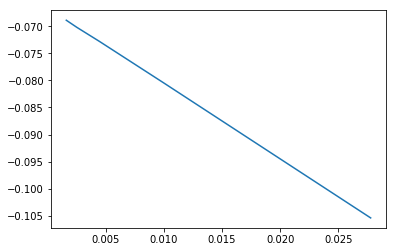

In [79]:
plt.plot(k**-2,Psp,'-')

In [80]:
#path = "/home/nadamski/ScN_figures/Polar_GaNScN/GaN_data/"
path = "/home/nadamski/SP/GaN25_sp/GaN25_sp/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    dip = sp_wz_1(lpath)
    tf[a] = dip["Mod"][2]

x = np.array([float(j) for j in folders])
cf = 1.6e-19/5.2000529025666484/2.7724226341815377/3.2013335674394536 * 1e20
#print(tf)
tf = (tf - 0.01) % 5.2000529025666484 + 0.01 - 5.2000529025666484
P_GaN = -cf*tf
print(P_GaN)
u_wzG = 0.5 - x * (0.4995750046824270-0.3770187094116295)/11
P_GaN = P_GaN[:-1]
u_wzG = u_wzG[:-1]

[-5.58238313e-07  1.22916341e-01  2.45677236e-01  3.68094924e-01
  4.89992600e-01  6.11252395e-01  7.31650983e-01  8.50955534e-01
  9.68984323e-01  1.08565068e+00  1.20099677e+00  1.31529187e+00
  1.34026574e+00]


In [90]:
#path = "/home/nadamski/ScN_figures/Polar_GaNScN/GaN_data/"
path = "/home/nadamski/SP/GaN25_sp/PBE/k668/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    dip = sp_wz_1(lpath)
    tf[a] = dip["Mod"][2]

x = np.array([float(j) for j in folders])
cf = 1.6e-19/5.2000529025666484/2.7724226341815377/3.2013335674394536 * 1e20
#print(tf)
tf = (tf - 0.01) % 5.2000529025666484 + 0.01 - 5.2000529025666484
P_GaN = -cf*tf
print(P_GaN)
u_wzG = 0.5 - x * (0.4995750046824270-0.3770187094116295)/11
P_GaN = P_GaN[:-1]
u_wzG = u_wzG[:-1]

[-5.58238313e-07  1.15598043e-01  2.30960905e-01  3.45876557e-01
  4.60157796e-01  5.73683283e-01  6.86337164e-01  7.97987143e-01
  9.08513896e-01  1.01787582e+00  1.12606946e+00  1.23320227e+00
  1.33958973e+00]


In [91]:
#path = "/home/nadamski/ScN_figures/Polar_GaNScN/GaN_data/"
path = "/home/nadamski/SP/GaN25_sp/PBE/k10/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    dip = sp_wz_1(lpath)
    tf[a] = dip["Mod"][2]

x = np.array([float(j) for j in folders])
cf = 1.6e-19/5.2000529025666484/2.7724226341815377/3.2013335674394536 * 1e20
#print(tf)
tf = (tf - 0.01) % 5.2000529025666484 + 0.01 - 5.2000529025666484
P_GaN = -cf*tf
print(P_GaN)
u_wzG = 0.5 - x * (0.4995750046824270-0.3770187094116295)/11
P_GaN = P_GaN[:-1]
u_wzG = u_wzG[:-1]

ValueError: could not convert string to float: 'head:'

In [92]:
#path = "/home/nadamski/ScN_figures/Polar_GaNScN/GaN_data/"
path = "/home/nadamski/SP/GaN25_sp/PBE/k12/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    dip = sp_wz_1(lpath)
    tf[a] = dip["Mod"][2]

x = np.array([float(j) for j in folders])
cf = 1.6e-19/5.2000529025666484/2.7724226341815377/3.2013335674394536 * 1e20
#print(tf)
tf = (tf - 0.01) % 5.2000529025666484 + 0.01 - 5.2000529025666484
P_GaN = -cf*tf
print(P_GaN)
u_wzG = 0.5 - x * (0.4995750046824270-0.3770187094116295)/11
P_GaN = P_GaN[:-1]
u_wzG = u_wzG[:-1]

ValueError: could not convert string to float: 'head:'

In [94]:
path = "/home/nadamski/SP/ScN_rs/HSE/sv/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=2)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/100
cf = 16/2.2482935084854385**3/2
P_ScN = cf*tf
print(repr(P_ScN[:7]))

u_m_Sc = 3*x - 1
u_m_Ga = 1 - 2 * u_wzG
u_m_Al = 1 - 2 * u_wzA

array([-0.09659815,  0.0208262 ,  0.19334402,  0.35047724,  0.64575689,
        0.96037723,  1.20203185])


In [95]:
path = "/home/nadamski/SP/ScN_rs/PBE/k6/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=2)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/100
cf = 16/2.2482935084854385**3/2
P_ScN = cf*tf
print(repr(P_ScN))
print(tf)
u_m_Sc = 3*x - 1
u_m_Ga = 1 - 2 * u_wzG
u_m_Al = 1 - 2 * u_wzA

array([-0.11290425,  0.03461957,  0.17732902,  0.30287933,  0.41854822,
        0.53199506,  0.64942408,  0.77401466,  0.90420226,  1.03578409,
        1.16594749])
[-0.16039075  0.04918025  0.25191199  0.43026763  0.5945858   0.75574735
  0.92256594  1.09955819  1.28450151  1.47142547  1.6563344 ]


In [96]:
path = "/home/nadamski/SP/ScN_rs/PBE/k10/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=2)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/100
cf = 16/2.2482935084854385**3/2
P_ScN = cf*tf
print(repr(P_ScN))

u_m_Sc = 3*x - 1
u_m_Ga = 1 - 2 * u_wzG
u_m_Al = 1 - 2 * u_wzA

array([-0.08012733,  0.0652876 ,  0.20609926,  0.33110673,  0.44524909,
        0.55679444,  0.67258986,  0.79590435,  0.92484021,  1.05475169,
        1.18295213])


In [97]:
path = "/home/nadamski/SP/ScN_rs/PBE/k15/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=2)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/100
cf = 16/2.2482935084854385**3/2
P_ScN = cf*tf
print(repr(P_ScN))

u_m_Sc = 3*x - 1
u_m_Ga = 1 - 2 * u_wzG
u_m_Al = 1 - 2 * u_wzA

array([-0.06998676,  0.07529603,  0.21600379,  0.3404083 ,  0.45371841,
        0.5645407 ,  0.67983634,  0.80287855,  0.93155021,  1.06099833,
        1.18851595])


In [98]:
path = "/home/nadamski/SP/ScN_rs/PBE/k20/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=2)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/100
cf = 16/2.2482935084854385**3/2
P_ScN = cf*tf
print(repr(P_ScN))

u_m_Sc = 3*x - 1
u_m_Ga = 1 - 2 * u_wzG
u_m_Al = 1 - 2 * u_wzA

array([-0.06643967,  0.07884688,  0.21951769,  0.34367532,  0.45669321,
        0.56725151,  0.68237651,  0.80533336,  0.93391557,  1.0632011 ,
        1.19051548])


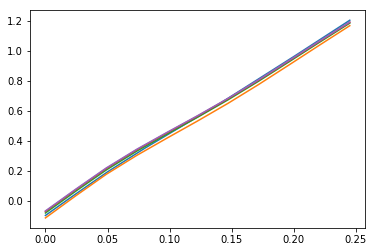

In [99]:
u_m_Sc = np.array([-1.000000e-06,  2.000000e-02,  5.000000e-02,  8.000000e-02,
        1.400000e-01,  2.000000e-01,  2.451125e-01,  2.499980e-01,
        2.600000e-01,  3.200000e-01,  3.800000e-01,  4.400000e-01,
        4.700000e-01,  4.970000e-01,  4.997000e-01,  4.999700e-01,
        4.999970e-01,  5.000000e-01,  5.000030e-01,  5.003000e-01,
        5.030000e-01])


plt.plot(u_m_Sc[:7], np.array([-0.09659815,  0.0208262 ,  0.19334402,  0.35047724,  0.64575689, 0.96037723,  1.20203185]))

u2 = np.arange(0,11) * 0.02451125
         
plt.plot(u2, np.array([-0.11290425,  0.03461957,  0.17732902,  0.30287933,  0.41854822,
        0.53199506,  0.64942408,  0.77401466,  0.90420226,  1.03578409,
        1.16594749]))

plt.plot(u2, np.array([-0.08012733,  0.0652876 ,  0.20609926,  0.33110673,  0.44524909,
        0.55679444,  0.67258986,  0.79590435,  0.92484021,  1.05475169,
        1.18295213]))

plt.plot(u2, np.array([-0.06998676,  0.07529603,  0.21600379,  0.3404083 ,  0.45371841,
        0.5645407 ,  0.67983634,  0.80287855,  0.93155021,  1.06099833,
        1.18851595]))

plt.plot(u2, np.array([-0.06643967,  0.07884688,  0.21951769,  0.34367532,  0.45669321,
        0.56725151,  0.68237651,  0.80533336,  0.93391557,  1.0632011 ,
        1.19051548]))



In [100]:
np.arange(11) * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [101]:
path = "/home/nadamski/SP/ScN_rs/PBE/large/k6/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=2, var=2)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/100
cf = 16/2.2482935084854385**3/2
P_ScN = cf*tf
print(repr(P_ScN))

u_m_Sc = 3*x - 1
u_m_Ga = 1 - 2 * u_wzG
u_m_Al = 1 - 2 * u_wzA

array([-0.11290425,  0.18263107,  0.42758644,  0.6639371 ,  0.92520592,
        1.19166559,  1.45358067,  1.72719945,  2.02456859])


In [102]:
path = "/home/nadamski/SP/ScN_rs/PBE/large/k20/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=2, var=2)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/100
cf = 16/2.2482935084854385**3/2
P_ScN = cf*tf
print(repr(P_ScN))

u_m_Sc = 3*x - 1
u_m_Ga = 1 - 2 * u_wzG
u_m_Al = 1 - 2 * u_wzA

array([-0.06643967,  0.22477975,  0.46549584,  0.69666195,  0.9546063 ,
        1.21559143,  1.47130867,  1.73670979,  2.02745028])


In [103]:
np.array([-0.06643967,  0.22477975,  0.46549584,  0.69666195,  0.9546063 ,
        1.21559143,  1.47130867,  1.73670979,  2.02745028]) - np.array([-0.11290425,  0.18263107,  0.42758644,  0.6639371 ,  0.92520592,
        1.19166559,  1.45358067,  1.72719945,  2.02456859])

array([0.04646458, 0.04214868, 0.0379094 , 0.03272485, 0.02940038,
       0.02392584, 0.017728  , 0.00951034, 0.00288169])

In [104]:
path = "/home/nadamski/SP/ScN_rs/HSE/nosv/k6/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=1)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/100
cf = 16/2.2482935084854385**3/2
P_ScN = cf*tf
print(repr(P_ScN))

u_m_Sc = 3*x - 1
u_m_Ga = 1 - 2 * u_wzG
u_m_Al = 1 - 2 * u_wzA

array([-0.10178806,  0.08996287,  0.27043577,  0.43477803,  0.59568737,
        0.76345572,  0.93891751,  1.17826783,  1.29151147,  1.46729027,
        1.64795825,  1.83761207,  2.03833666,  2.25219253,  2.48284963,
        2.73083222])


In [105]:
path = "/home/nadamski/SP/ScN_rs/HSE/nosv/k10/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=1)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/100
cf = 16/2.2482935084854385**3/2
P_ScN = cf*tf
print(repr(P_ScN))

u_m_Sc = 3*x - 1
u_m_Ga = 1 - 2 * u_wzG
u_m_Al = 1 - 2 * u_wzA

array([-0.07337961,  0.11651806,  0.2953084 ,  0.45761452,  0.61630483,
        0.78226869,  0.95608451,  1.19252083,  1.30426479,  1.47751975,
        1.65524934,  1.84169655,  2.04058007,  2.25472857,  2.48570267,
        2.73083222])


In [106]:
path = "/home/nadamski/SP/ScN_rs/HSE/nosv/k15/"
folders = !ls "{path##*/}"
r = len(folders)
tf = np.zeros(r)
for a in range(r):
    lpath = path + folders[a]
    #print(folders[a])
    dip = sp_rs_1(lpath, spin=1)
    tf[a] = sum(i**2 for i in dip["Mod"])**0.5*np.sign(dip["Mod"][0])

x = np.array([float(j) for j in folders])/100
cf = 16/2.2482935084854385**3/2
P_ScN = cf*tf
print(repr(P_ScN))

u_m_Sc = 3*x - 1
u_m_Ga = 1 - 2 * u_wzG
u_m_Al = 1 - 2 * u_wzA

array([-0.06447911,  0.12516252,  0.3034042 ,  0.46485685,  0.62276684,
        0.78823081,  0.96160769,  1.19712958,  1.3083005 ,  1.48064102,
        1.65748056,  1.84312307,  2.04129943,  2.25492365,  2.48578801,
        2.73083222])


In [107]:
import numpy.polynomial.polynomial as poly


k2 = np.array([6.0, 10.0, 15.0])**-1
P = np.array([-0.10178806, -0.07337961, -0.06447911])

exp = poly.polyfit(k2,P,2)
exp

array([-0.05728556, -0.00182875, -1.5911175 ])

In [46]:
0.06447911 - 0.10178806

-0.037308949999999994

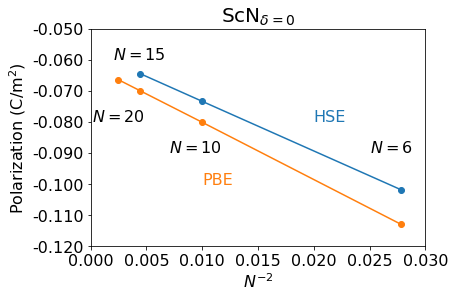

In [47]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)


plt.plot(np.array([6.0, 10.0, 15.0])**-2, [-0.10178806, -0.07337961, -0.06447911], 'o')
plt.plot(np.array([6.0, 10.0, 15.0, 20.0])**-2, [-0.11290425 , -0.08012733, -0.06998676, -0.06643967], 'o')

plt.plot(np.array([6.0, 10.0, 15.0])**-2, [-0.10178806, -0.07337961, -0.06447911], color='C0')
plt.plot(np.array([6.0, 10.0, 15.0, 20.0])**-2, [-0.11290425 , -0.08012733, -0.06998676, -0.06643967], color='C1')



ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))

plt.xlim([0, 0.03])
plt.ylim([-0.12, -0.05])

plt.text(0.02, -0.08, r'HSE', color='C0', fontsize=16)
plt.text(0.01, -0.10, r'PBE', color='C1', fontsize=16)

plt.text(0.025, -0.09, r'$N = 6$', color='k', fontsize=16)
plt.text(0.007, -0.09, r'$N = 10$', color='k', fontsize=16)
plt.text(0.002, -0.06, r'$N = 15$', color='k', fontsize=16)
plt.text(0.0001, -0.08, r'$N = 20$', color='k', fontsize=16)


plt.xlabel(r'$N^{-2}$', fontsize=16)
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
plt.title(r'ScN$_{\delta=0}$', fontsize=20)
plt.savefig('k2.png', bbox_inches='tight', format='png', dpi=300)
plt.show()

In [48]:
import numpy.polynomial.polynomial as poly


k2 = np.array([6.0, 10.0, 15.0])**-2
P = np.array([1.17826783, 1.19252083, 1.19712958])

exp = poly.polyfit(k2,P,1)
exp

array([ 1.20066026, -0.80674467])

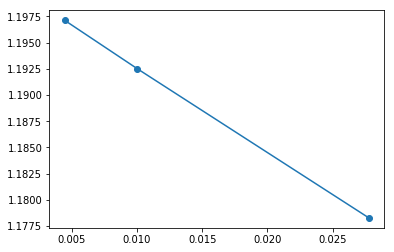

In [49]:
plt.plot(np.array([6.0, 10.0, 15.0])**-2, [1.17826783, 1.19252083, 1.19712958], 'o')
plt.plot(np.array([6.0, 10.0, 15.0])**-2, [1.17826783, 1.19252083, 1.19712958], color='C0')

In [50]:
1.31529187 - 1.19226893

0.12302294000000003

In [51]:
u_m_Ga

array([0.        , 0.02228296, 0.04456593, 0.06684889, 0.08913185,
       0.11141481, 0.13369778, 0.15598074, 0.1782637 , 0.20054666,
       0.22282963, 0.24511259])

In [52]:
2/3 - 0.24511259 / 3

0.58496247

In [53]:
0.26518 * 16 / (3.2013335674394536 * 2.7724226341815377)

0.47804676621153464

In [54]:
V = 22.958980366997654
a_rs= -0.0152138008287036+2.2478462482262946+2.2478462482262946

k6_0 = (5.97398 + 2.89905 - 2*a_rs)* 3**0.5 * 16 / V
k10_0 = ((5.97398 + 2.92212- 2*a_rs) * 3**0.5) * 16 / V
k15_0 = ((5.97398 + 2.92934- 2*a_rs) * 3**0.5) * 16 / V

k6_245 = ((4.14360 + -3.17393) * 3**0.5) * 16 / V
k10_245 = ((4.14360 + -3.16236) * 3**0.5) * 16 / V
k15_245 = ((4.14360 + -3.15862) * 3**0.5) * 16 / V

array([-0.06261265, -1.56679928])

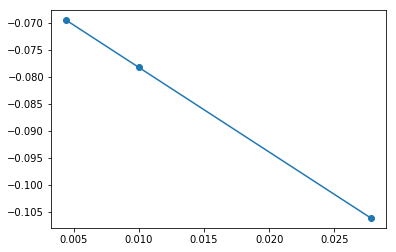

In [55]:
#strained 00
P00 = [k6_0, k10_0, k15_0]

k00 = np.array([6.0, 10.0, 15.0])
plt.plot(k00**-2, P00, 'o')
plt.plot(k00**-2, P00, color='C0')

exp = poly.polyfit(k00**-2,P00,1)
exp

array([ 1.19238745, -0.79043385])

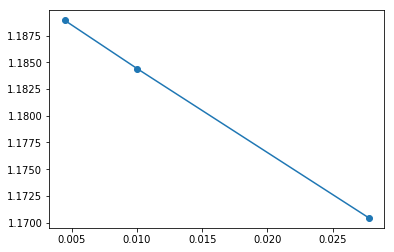

In [56]:
#strained 00
P245 = [k6_245, k10_245, k15_245]

k00 = np.array([6.0, 10.0, 15.0])
plt.plot(k00**-2, P245, 'o')
plt.plot(k00**-2, P245, color='C0')

exp = poly.polyfit(k00**-2,P245,1)
exp

In [57]:
P_GaN

array([-5.58238313e-07,  1.22916341e-01,  2.45677236e-01,  3.68094924e-01,
        4.89992600e-01,  6.11252395e-01,  7.31650983e-01,  8.50955534e-01,
        9.68984323e-01,  1.08565068e+00,  1.20099677e+00,  1.31529187e+00])

In [58]:
1.31529187- k15_245

0.126364224490773

In [59]:
k15_245

1.188927645509227

In [60]:
k15_0

-0.069571654114302

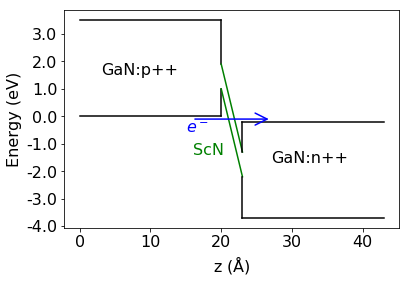

In [61]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(111)


plt.plot([0, 20], [3.5, 3.5], 'black')
plt.plot([0, 20], [0, 0], 'black')



n = 3
A = 1
B = -2.2

plt.plot([20, 20], [0, A], 'black')
plt.plot([20, 20], [3.5, A+0.9], 'black')

plt.plot([20, 20+n], [A, B], 'green')
plt.plot([20, 20+n], [A + 0.9, B + 0.9], 'green')

plt.plot([20+n, 20+n], [-3.7, B], 'black')
plt.plot([20+n, 20+n], [-0.2, B+0.9], 'black')


plt.plot([20+n, 40+n], [-0.2, -0.2], 'black')
plt.plot([20+n, 40+n], [-3.7, -3.7], 'black')

ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

ax.annotate('', xytext=(16,-0.1), xy=(27,-0.1), size=30, 
            arrowprops={'arrowstyle': '->','lw':1.5, 'color':'blue'}, va='center')


plt.text(3, 1.50, r'GaN:p++', color='black', fontsize=16)
plt.text(27, -1.70, r'GaN:n++', color='black', fontsize=16)
plt.text(16, -1.40, r'ScN', color='green', fontsize=16)

plt.text(15, -0.6, r'$e^-$', color='blue', fontsize=16)


plt.xlabel(r'z ($\rm \AA$)', fontsize=16)
plt.ylabel(r'Energy (eV)', fontsize=16)
plt.savefig('schematic.png', bbox_inches='tight', format='png', dpi=300)
plt.show()


In [5]:
a8 = [24.68691+1.32064, 5.0082656966862480, 5.4199707562163688, 6.2573625562605475]
a7 = [24.64970+1.89514, 5.0303820436217093, 5.5132963370035331, 6.3755976626100654]
a6 = [24.24301+2.84777, 5.0047792179943400, 5.6229056906795245, 6.4988592568469938]
a5 = [24.37905+3.26830, 5.0516759203417028, 5.6910944939061476, 6.6291277240042001]
a4 = [31.87594-3.54678, 5.0151379723133953, 5.7824555911600948, 6.7913164649016142]
a3 = [19.64542+3.04570, 4.5723200231819412, 6.0589359077676566, 7.0967865102725680]
a2 = [18.44335-2.57077, 4.4817953528515044, 6.2584256762325525, 7.2163398896011142]
a1 = [18.16030-1.40494, 4.4786640852492834, 6.3409100658611903, 7.3496313476596100]
a0 = [17.86869+0.03339, 4.4833031162426442, 6.4379070776774023, 7.4467802387832407]

A = np.array([(a8[0]-8*a8[1]) * -16 / (a8[1]*a8[2]*a8[3]),
            (a7[0]-8*a7[1]) * -16 / (a7[1]*a7[2]*a7[3]),
            (a6[0]-8*a6[1]) * -16 / (a6[1]*a6[2]*a6[3]),
            (a5[0]-8*a5[1]) * -16 / (a5[1]*a5[2]*a5[3]),
            (a4[0]-8*a4[1]) * -16 / (a4[1]*a4[2]*a4[3]),
            (a3[0]-6*a3[1]) * -16 / (a3[1]*a3[2]*a3[3]),
            (a2[0]-4*a2[1]) * -16 / (a2[1]*a2[2]*a2[3]),
            (a1[0]-4*a1[1]) * -16 / (a1[1]*a1[2]*a1[3]),
            (a0[0]-4*a0[1]) * -16 / (a0[1]*a0[2]*a0[3])])

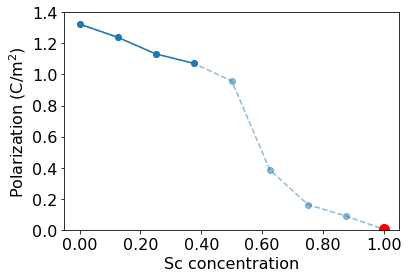

In [6]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

plt.ylim([0, 1.4])

plt.plot(np.linspace(0, 1, 9), A, '--', color='C0', alpha=0.5, marker='o')
plt.plot(np.linspace(0, 0.375, 4), A[0:4], color='C0', marker='o')
plt.ylabel(r'Polarization (C/m$^2$)', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.set_xticklabels(ax.get_xticks(), fontsize=16)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

#plt.title(u'Wurtzite Al$_x$Sc$_{1-x}$N',fontdict={'size':16})


#plt.xlabel(r'Al$_x$Sc$_{8-x}$N$_8$', fontsize=16)
plt.xlabel(r'Sc concentration', fontsize=16)

n = 8
plt.plot(n/8, A[n], color='red', marker='o', markersize=10)
plt.savefig('/home/nadamski/ScN_gif/AlScN/figs/{}.png'.format(n), bbox_inches='tight', format='png', dpi=300)

